# Task 2 - False Color Image 

Date: 2024-11-23

Author: Jordan Sibley 

[Github Repository](https://github.com/jordancsibley/eds220-hwk4)

### About 

**Purpose:** This notebook focuses on analyzing satellite imagery to assess the impact of the Thomas Fire, which occurred in 2017. Using Landsat 8 imagery and fire perimeter data, this notebook demonstrates how false color imaging techniques can be applied to identify fire scars and vegetation health.

**Highlights:**
- **Data Wrangling**: A portion of the notebook involves cleaning and preparing the Landsat dataset for analysis, including dropping the band dimension for better usablity.  
- **Map Creation**: Mulitple maps are created in this notebook (both true color and false color images) by choosing certain bands from the Landsat data which allows for a clear visual comparison of the fire's impact
- **False Color Imaging**: The notebook explores how false color images can highlight burn areas using shortwave infrared (SWIR) and near-infrared (NIR) bands to distinguish between burned land and healthy vegetation.


**Data:** 
- **Landsat 8 Data**: The Landsat data used in this analysis is the landsat8-2018-01-26-sb-simplified.nc dataset, which includes key spectral bands (e.g., shortwave infrared, near-infrared, and red) for the Santa Barbara region. This data is used to create both true color and false color images, with specific bands selected to highlight different land features.
- **Fire Perimeter Data:** The fire perimeter data comes from CAL FIRE and is used to overlay the Thomas Fire’s boundary on the imagery. The selected dataset includes the fire perimeter for the 2017 Thomas Fire.

**References**:

Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2 [dataset]. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6 

California Department of Forestry and Fire Protection (CAL FIRE). (2023). California fire perimeters (all). Data.gov. https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436

### Setup 

In [1]:
# Import libraries 
import geopandas as gpd 
import os 
import rioxarray as rioxr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # For custom legend creation
from matplotlib_scalebar.scalebar import ScaleBar 

In [2]:
# File path to data on workbench 
fp = os.path.join("/courses/EDS220/data/hwk4_landsat_data/landsat8-2018-01-26-sb-simplified.nc")
landsat = rioxr.open_rasterio(fp)

### Data Exploration 

In [3]:
# Explore landsat data 
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [4]:
# View data elements 
print('Height: ', landsat.rio.height)
print('Width: ', landsat.rio.width)
print('Size of dimensions: ', dict(landsat.sizes))
print('Spatial bounding box:')
print(landsat.rio.bounds(), '\n')
print('CRS: ', landsat.rio.crs)

Height:  731
Width:  870
Size of dimensions:  {'band': 1, 'x': 870, 'y': 731}
Spatial bounding box:
(121170.0, 3755160.0, 356070.0, 3952530.0) 

CRS:  EPSG:32611


The landsat data is an xarray that contains the band information. The dimensions are x and y and also band that just contains the interger 1.  The data variables of the xarray are the band types which are red, green, blue, near infrared (nir08), and the shortwave infrared (swir22). 

### Data Cleaning 

In [5]:
# Drop the `band` dimension of the data and remove dims of length 1 
landsat = landsat.squeeze().drop_vars('band')

# View altered landsat data 
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

### Map Creation  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


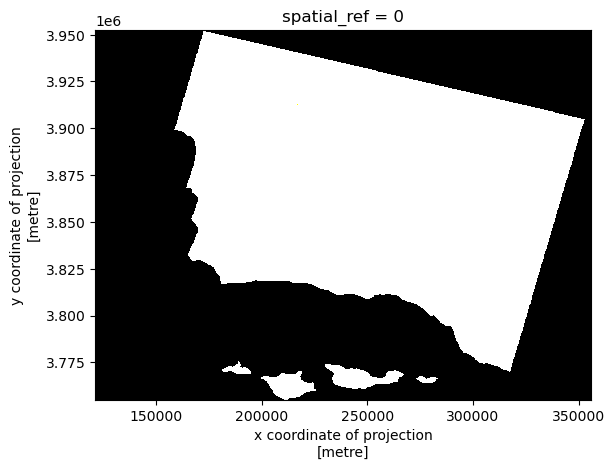

In [6]:
# Select bands to create RGB image 
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

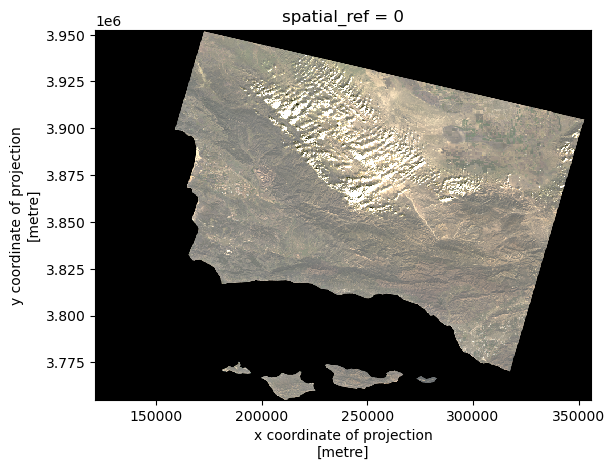

In [7]:
# Adjust scale to get true color image 
landsat[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)


In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (b).

#### Map Output Explanation 

The first map above is an RBG image of the landsat data. It contains black and white outline of the area of interest, but does not tell us any important about the wavelengths used. In the following map, an RGB image is created that actually matches the expected true colors of the environment. The only difference between the two maps is the `robust` parameter within `plot.imshow()`. When set to true, it adjusts the color scale to exlude outliers and improving visualization. 


### False Color Image

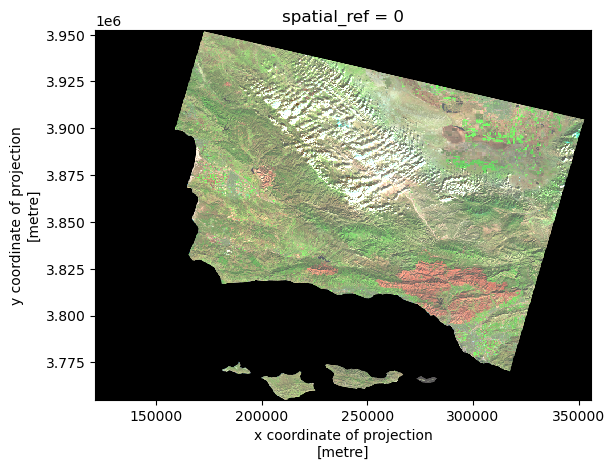

In [8]:
# Create false color image with short infrared, near infrared and red 
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True)

### Exploring perimeter of Thomas Fire 

In [9]:
# Read in Thomas fire perimeter data 
thomas = gpd.read_file('thomas-fire-boundary-file/thomas.shp')

# View dataset 
thomas

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,9,7,1,281791.0,CONT_DATE based on Inciweb,None,None,None,None,2010,"MULTIPOLYGON (((-13316089.016 4088553.040, -13..."


In [10]:
# Ensure CRSs match (and reproject if necessary)
if landsat.rio.crs != thomas.crs:
    thomas = thomas.to_crs(landsat.rio.crs)

# Validate the CRSs match
assert landsat.rio.crs == thomas.crs

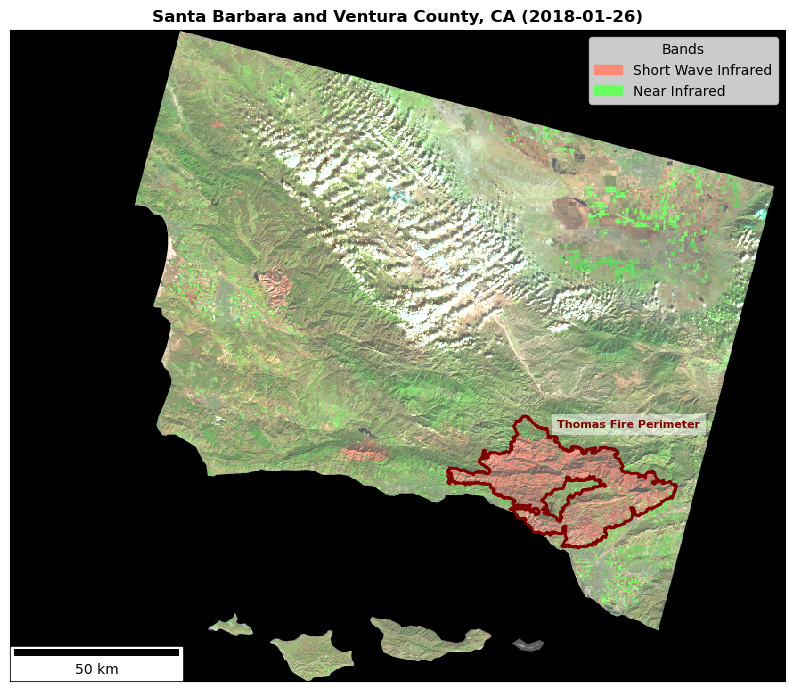

In [11]:
# Plot false color image with thomas fire boundary 
fig, ax= plt.subplots(figsize = (10, 10), facecolor='white')

# False color landsat image 
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust=True,
                                                           ax=ax
                                                          )

# Overlay Thomas Fire boundary
thomas.boundary.plot(ax=ax,
                     color = "maroon",
                     linewidth=2)

# Create custom legend for short wave and infrared 
swir_patch = mpatches.Patch(color='#FD8A75', label='Short Wave Infrared')
nir_patch = mpatches.Patch(color='#67FF5B', label='Near Infrared')


# Set legend position 
ax.legend(handles=[swir_patch, nir_patch], loc='upper right', title='Bands')


# Set perimeter label 
ax.text(
    x=287070.0, y=3832030.0,  # Coordinates 
    s="Thomas Fire Perimeter",  # Label text
    color='maroon', fontsize=8, weight='bold',  
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none') 
    
)
# Set scale bar 
scalebar = ScaleBar(1, units='m', location='lower left', length_fraction=0.25, scale_loc='bottom', color='black')  
ax.add_artist(scalebar)


# Set title                                                           
ax.set_title("Santa Barbara and Ventura County, CA (2018-01-26)", weight='bold')

# Remove axes ticks
ax.set_xticks([])  
ax.set_yticks([])  

# Remove axes labels
ax.set_xlabel("")  
ax.set_ylabel("")  

plt.show()

**Figure Description:** This map highlights the area of Santa Barbara and Ventura counties affected by the Thomas Fire, which burned over 280,000 acres from December 4, 2017, until its containment on January 12, 2018. The fire's total burn perimeter is outlined in dark red. The false-color image incorporates shortwave infrared (SWIR) in red, which is particularly effective for identifying areas of burn damage, as newly burned land strongly reflects SWIR wavelengths. The near-infrared (NIR) band is represented in green, highlighting healthy vegetation, as plants strongly reflect NIR. 